In [20]:
import pandas as pd
import numpy as np

import ast

import matplotlib.pyplot as plt

from wordcloud import WordCloud

import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk import PorterStemmer

from gensim.models import TfidfModel
from gensim.corpora import Dictionary
from gensim.models import LdaModel

In [ ]:
# To be run only once

# nltk.download('popular')

In [2]:
def str_to_list(s):
    return ast.literal_eval(s)

df = pd.read_csv('statements.csv', converters={'text': str_to_list}, index_col=0)

In [3]:
df = df[~df['title'].duplicated()]

In [4]:
def process_hyphs(string):
    if '-' in string and len(string.split('-')) == 2:
        split_word = string.split('-')
        return split_word[0] + split_word[1]
    return string

In [6]:
stopword_list = stopwords.words('english')
stemmer = PorterStemmer()

punctuation = '?,.%$;:--'

def process(string):
    tokens = word_tokenize(string.lower())
    tokens = [process_hyphs(token) for token in tokens]
    filtered_tokens = [token for token in tokens if token not in stopword_list and token not in punctuation]
    stemmed_tokens = [stemmer.stem(token).strip() for token in filtered_tokens]
    
    return stemmed_tokens

In [44]:
# documents = []
# for i, row in df.iterrows():
#     for para in row['text']:
#         if not 'Voting for the FOMC' in para:
#             documents += [process(para)]

In [62]:
sents = []
for i, row in df.iterrows():
    for para in row['text']:
        if not 'Voting for the FOMC' in para:
            for sent in sent_tokenize(para):
                sents += [(i, process(sent), word_tokenize(sent))]


In [65]:
sents[0][2]

['Information',
 'received',
 'since',
 'the',
 'Federal',
 'Open',
 'Market',
 'Committee',
 'met',
 'in',
 'July',
 'suggests',
 'that',
 'economic',
 'activity',
 'is',
 'expanding',
 'at',
 'a',
 'moderate',
 'pace',
 '.']

In [63]:
sents

for sent in sents:
    for token in sent[1]:
        if not token.isalnum():
            print(token)

's
's
's
's
's
's
1/4
's
's
's
's
's
's
's
1/4
's
's
's
's
's
's
's
1/4
's
's
's
's
's
's
's
1/4
's
's
's
's
's
's
's
1/4
's
61/2
's
's
's
's
's
's
's
's
's
1/4
61/2
's
61/2
's
's
's
's
's
's
's
1/4
61/2
's
61/2
's
's
's
's
's
's
1/4
61/2
's
's
's
's
's
's
1/4
61/2
's
's
1/4
61/2
's
's
1/4
61/2
's
's
1/4
61/2
's
's
1/4
61/2
's
's
's
p.m.
's
p.m.
's
2:30
p.m.
202-452-2955
committeeâ
1/4
61/2
committeeâ
committeeâ
1/4
61/2
committeeâ
committeeâ
1/4
committeeâ
1/4
1/4
1/4
1/4
1/4
's
1/4
committeeâ
1/4
's
1/4
's
1/4
's
1/4
w.
i.
's
1/4
1/4
1/4
1/4
u.s.
1/4
m.
mr.
1/4
m.
mr.
mr.
1/4
m.
mr.
committeeâ
1/4
m.
's
mr.
's
's
1/4
u.s.
u.s.
u.s.
u.s.
u.s.
(
)
(
)
u.s.
1/4
1/4
1.25
1/4
1.25
1/4
1.25
reserveâ
reserveâ
1/4
1.25
1/4
1.25
reserveâ
1/4
1.25
1/4
1.25
1/4
1.25
's
u.s.
1/4
reserveâ
1.25
's
1/4
's
's
's
1/4
's
's
's
75-basis-point
1/2
1/4
u.s.
todayâ
50-basis-point
11/4
11/2
50-basis-point
13/4
25-basis-point
21/4
21/4
todayâ
75-basis-point
21/2
(
)
(
)
residenti

In [14]:
len(sents)

1493

In [21]:
dct = Dictionary([sent[1] for sent in sents])
corpus = [dct.doc2bow(sent[1]) for sent in sents]
tfidf = TfidfModel(corpus)
# test = tfidf[corpus[0]]

In [22]:
num_topics = 15

temp = dct[0]
id2word = dct.id2token

model = LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics, random_state=5, passes=10)

In [66]:
sent_df = pd.DataFrame({'tokens': [sent[1] for sent in sents], 'statement_index': [
                       sent[0] for sent in sents], 'raw_tokens': [sent[2] for sent in sents]})

In [67]:
sent_df

,tokens,statement_index,raw_tokens
0,"[inform, receiv, sinc, feder, open, market, co...",0,"[Information, received, since, the, Federal, O..."
1,"[balanc, labor, market, condit, improv, somewh...",0,"[On, balance, ,, labor, market, conditions, im..."
2,"[household, spend, appear, rise, moder, busi, ...",0,"[Household, spending, appears, to, be, rising,..."
3,"[fiscal, polici, restrain, econom, growth, alt...",0,"[Fiscal, policy, is, restraining, economic, gr..."
4,"[inflat, run, committe, 's, longerrun, object]",0,"[Inflation, has, been, running, below, the, Co..."
...,...,...,...
1488,"[discount, rate, interest, rate, charg, deposi...",177,"[The, discount, rate, is, the, interest, rate,..."
1489,"[feder, open, market, committe, decid, today, ...",179,"[The, Federal, Open, Market, Committee, decide..."
1490,"[action, taken, cushion, effect, prospect, eco...",179,"[The, action, was, taken, to, cushion, the, ef..."
1491,"[recent, chang, global, economi, adjust, u.s.,...",179,"[The, recent, changes, in, the, global, econom..."


In [33]:
def topic_from_para(sent, crit):
    topics = [0] * 15
    for word in sent:
        for topic_pair in model.get_term_topics(word[0]):
            print(topic_pair)
            topic = topic_pair[0]
            prob = topic_pair[1]
            topics[topic] += prob / len(sent)
    max = -1
    max_prob = 0
    for i, topic_prob in enumerate(topics):
        print(topic_prob)
        if topic_prob > max_prob:
            max_prob = topic_prob
            max = i
    if max_prob > crit:
        return max
    else:
        return -1

In [68]:
for i, row in sent_df.iterrows():
    sent_df.loc[i, 'topic_gen'] = model[corpus[i]][0][0]
    sent_df.loc[i, 'text'] = ' '.join(row['tokens']).strip()
    sent_df.loc[i, 'topic_crit'] = topic_from_para(corpus[i], 0.001)
sent_df

(11, 0.011930256)
(12, 0.014348825)
(1, 0.04577098)
(3, 0.040338606)
(4, 0.041900456)
(5, 0.020779336)
(6, 0.029756498)
(7, 0.03993625)
(9, 0.056797326)
(10, 0.04202946)
(11, 0.044214416)
(12, 0.033610117)
(13, 0.029748965)
(14, 0.03061474)
(0, 0.042703666)
(3, 0.04461339)
(4, 0.024019577)
(5, 0.014380209)
(6, 0.030438432)
(9, 0.044637963)
(11, 0.017147781)
(12, 0.018774647)
(1, 0.12075515)
(2, 0.038664315)
(4, 0.025465744)
(5, 0.013213539)
(10, 0.01922873)
(11, 0.052862525)
(14, 0.012625197)
(3, 0.01993639)
(7, 0.0121423025)
(11, 0.02384025)
(0, 0.014212967)
(1, 0.05878478)
(6, 0.026157057)
(7, 0.024821995)
(11, 0.04512628)
(12, 0.036531415)
(14, 0.050684832)
(11, 0.0251083)
(12, 0.0110368095)
(13, 0.012151256)
(1, 0.045425445)
(11, 0.039517324)
(5, 0.023432957)
(11, 0.012762682)
(12, 0.019457044)
(14, 0.014987931)
(11, 0.024527797)
(11, 0.028415669)
(11, 0.015179434)
0.0037944421793023745
0.018049090355634692
0.002577620993057887
0.006992559134960174
0.0060923850784699125
0.004787069

,tokens,statement_index,raw_tokens,topic_gen,text,topic_crit
0,"[inform, receiv, sinc, feder, open, market, co...",0,"[Information, received, since, the, Federal, O...",11.0,inform receiv sinc feder open market committe ...,11.0
1,"[balanc, labor, market, condit, improv, somewh...",0,"[On, balance, ,, labor, market, conditions, im...",4.0,balanc labor market condit improv somewhat how...,12.0
2,"[household, spend, appear, rise, moder, busi, ...",0,"[Household, spending, appears, to, be, rising,...",8.0,household spend appear rise moder busi fix inv...,8.0
3,"[fiscal, polici, restrain, econom, growth, alt...",0,"[Fiscal, policy, is, restraining, economic, gr...",0.0,fiscal polici restrain econom growth although ...,0.0
4,"[inflat, run, committe, 's, longerrun, object]",0,"[Inflation, has, been, running, below, the, Co...",10.0,inflat run committe 's longerrun object,10.0
...,...,...,...,...,...,...
1488,"[discount, rate, interest, rate, charg, deposi...",177,"[The, discount, rate, is, the, interest, rate,...",2.0,discount rate interest rate charg depositori i...,2.0
1489,"[feder, open, market, committe, decid, today, ...",179,"[The, Federal, Open, Market, Committee, decide...",1.0,feder open market committe decid today eas sta...,1.0
1490,"[action, taken, cushion, effect, prospect, eco...",179,"[The, action, was, taken, to, cushion, the, ef...",0.0,action taken cushion effect prospect econom gr...,3.0
1491,"[recent, chang, global, economi, adjust, u.s.,...",179,"[The, recent, changes, in, the, global, econom...",0.0,recent chang global economi adjust u.s. financ...,1.0


In [35]:
sent_df['topic_crit'].value_counts()

topic_crit
 1.0     179
 9.0     167
 8.0     139
 10.0    135
 12.0    120
 3.0     110
 2.0     110
 13.0    109
 7.0     103
 4.0      84
 6.0      54
 14.0     51
 11.0     50
 0.0      45
 5.0      31
-1.0       6
Name: count, dtype: int64

In [42]:
def gen_wordcloud(topic):
    allwords = ''.join(' ' + sent_df[sent_df['topic_crit'] == topic]['text']).strip()
    print(allwords)
    wordcloud = WordCloud(width=500, height=500, background_color='white', relative_scaling=1, repeat=False, collocations=False, prefer_horizontal=1).generate(allwords)
    plt.figure(figsize = (8,8))
    plt.imshow(wordcloud)

light cumul progress toward maximum employ improv outlook labor market condit sinc incept current asset purchas program committe decid make measur reduct pace asset purchas incom inform broadli support committe 's expect ongo improv labor market condit inflat move back toward longerrun object committe end current program asset purchas next meet howev asset purchas preset cours committe 's decis pace remain conting committe 's outlook labor market inflat well assess like efficaci cost purchas light cumul progress toward maximum employ improv outlook labor market condit sinc incept current asset purchas program committe decid make measur reduct pace asset purchas howev asset purchas preset cours committe 's decis pace remain conting committe 's outlook labor market inflat well assess like efficaci cost purchas light cumul progress toward maximum employ improv outlook labor market condit sinc incept current asset purchas program committe decid make measur reduct pace asset purchas howev a

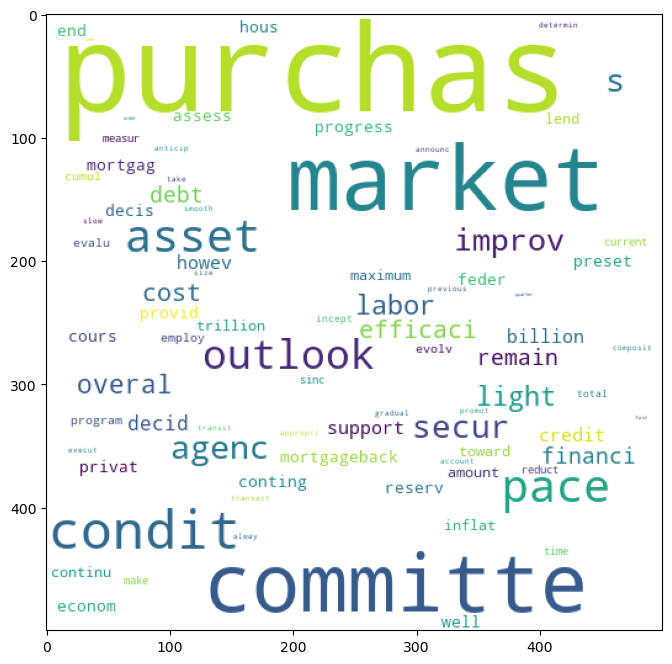

In [60]:
gen_wordcloud(14)

0       "inform receiv sinc feder open market committe...
1       "balanc labor market condit improv somewhat ho...
2       "household spend appear rise moder busi fix in...
3       "fiscal polici restrain econom growth although...
4               "inflat run committe 's longerrun object"
                              ...                        
1488    "discount rate interest rate charg depositori ...
1489    "feder open market committe decid today eas st...
1490    "action taken cushion effect prospect econom g...
1491    "recent chang global economi adjust u.s. finan...
1492             "discount rate remain unchang 5 percent"
Name: text, Length: 1493, dtype: object

In [69]:
sent_df.to_csv('sentences.csv')